In [19]:
 # Import Python libaries
%matplotlib inline
from scipy.optimize import curve_fit
import time as time
# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc, rcParams

import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import ensemble
from xgboost import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
# Machine learning & model visualization tools
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
# Miscellaneous
import os
import io
import pydot
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as BK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf

from bioinfokit.analys import stat
#from sklearn.inspection import partial_dependence, plot_partial_dependence

from progressbar import ProgressBar
pbar = ProgressBar()

global_split_rand = 2571

Text(0.5, 0, '!!!Ariaaaal')

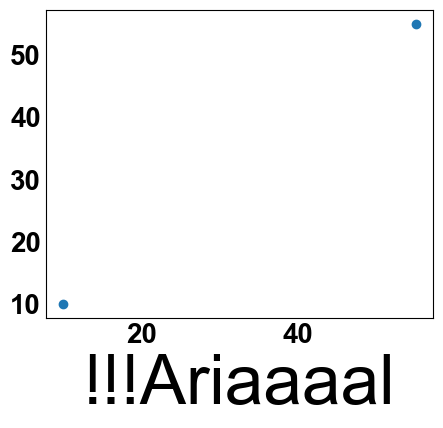

In [20]:
# check the font !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working: delet ~/.catch/matplotlib
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

rc('font', weight='bold')
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter([10, 55], [10, 55])
ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

In [66]:
df_eval = pd.read_csv('new_evaluated.csv',)
df_eval['status'] = "Evaluated"
df_eval['Strength'] = -df_eval['Strength']
df_eval['Toughness'] = -df_eval['Toughness']

df_init = pd.read_csv('initial.csv',)
df_init['status'] = "Initial"

df_comb = pd.concat ((df_init, df_eval), ignore_index=True)
df_comb

,sample,R1(HA),R2(IA),R3(NVP),R4(AA),R5(HEAA),R6(IBOA),Printability,Tg,Strength,Toughness,status
0,1,0.15,0.20,0.02,0.21,0.18,0.24,Y,56.6,45.51,2.33,Initial
1,2,0.25,0.31,0.11,0.02,0.16,0.15,Y,14.2,17.95,12.47,Initial
2,3,0.06,0.17,0.27,0.11,0.27,0.12,Y,54.8,32.74,0.69,Initial
3,4,0.00,0.10,0.30,0.20,0.20,0.20,Y,56.7,27.81,0.70,Initial
4,5,0.35,0.35,0.00,0.00,0.10,0.20,Y,13.1,1.20,2.15,Initial
...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,0.23,0.00,0.05,0.14,0.17,0.41,1,89.9,16.94,0.34,Evaluated
83,84,0.00,0.29,0.17,0.37,0.00,0.17,1,53.9,11.03,0.20,Evaluated
84,85,0.27,0.19,0.02,0.14,0.13,0.25,1,48.8,15.17,0.59,Evaluated
85,86,0.00,0.27,0.03,0.00,0.17,0.53,0,500.0,-0.00,-0.00,Evaluated


In [77]:
df_comb.groupby('status').mean()

/tmp/ipykernel_4094/1979650322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comb.groupby('status').mean()


,sample,R1(HA),R2(IA),R3(NVP),R4(AA),R5(HEAA),R6(IBOA),Tg,Strength,Toughness
status,,,,,,,,,,
Evaluated,65.5,0.247273,0.242727,0.050909,0.139318,0.175455,0.144318,56.663636,21.154091,6.408182
Initial,22.0,0.213953,0.243023,0.172326,0.123953,0.123721,0.123023,121.634884,16.064419,2.220698


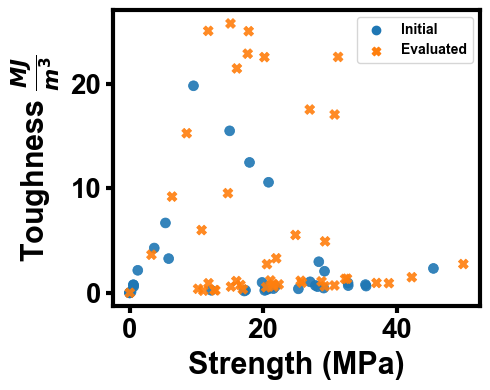

In [75]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', '*']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df_comb, x='Strength', y='Toughness'#, markers=markers
                , hue='status', edgecolor=None,
                style='status', alpha=0.9, s=50)

ax.set_xlabel('Strength (MPa)', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel(r'Toughness $\frac{MJ}{m^{3}}$', fontsize='22', 
              fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='20')

[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend()
plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-2, 40)
plt.savefig('eval_init_samples.jpeg', dpi=500)

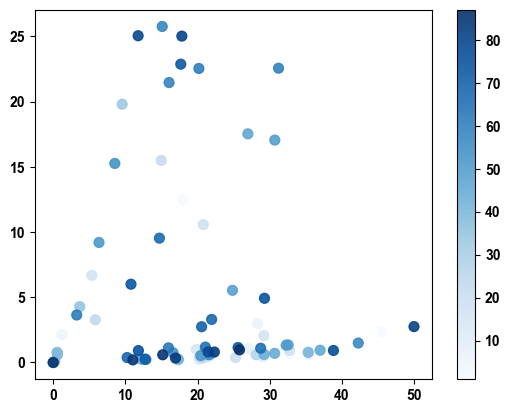

In [73]:
plt.scatter(data=df_comb, x='Strength', y='Toughness',c='sample',cmap='Blues'
                , alpha=0.9, s=50)
plt.colorbar()